In [31]:
# استيراد المكتبات الأساسية
# Import basic libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# تحميل بيانات التدريب والاختبار
# Load training and test data
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

In [33]:
# تحويل البيانات إلى DataFrame
# Convert data to DataFrame
df_test = pd.DataFrame(test_data)
df_train = pd.DataFrame(train_data)

In [34]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df_train['Age'].isna().sum()

np.int64(177)

In [37]:
# ملء القيم الناقصة في عمود Age بالمتوسط
# Fill in the missing values ​​in the Age column with the mean.
mean_age = round(df_train['Age'].mean(), 2)
df_train['Age'].fillna(mean_age, inplace=True)

C:\Users\games\AppData\Local\Temp\ipykernel_15688\1863275585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mean_age, inplace=True)


In [38]:
# استخراج أول حرف من عمود Cabin واستخدامه كميزة جديدة، وتعويض القيم الناقصة بحرف 'U'
# Extract the first character from the Cabin column and use it as a new feature, replacing the missing values ​​with 'U'
df_train['CabinLetter'] = df_train['Cabin'].astype(str).str[0]
df_train['CabinLetter'] = df_train['CabinLetter'].replace('n', 'U')
df_train.drop(columns='Cabin', inplace=True)

In [39]:
# معالجة القيم الناقصة في عمود Embarked وتعويضها بالقيمة الأكثر تكرارًا
# Process missing values ​​in the Embarked column and replace them with the most frequent value
df_train['Embarked'].value_counts()
df_train['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].isna().sum()

C:\Users\games\AppData\Local\Temp\ipykernel_15688\585975681.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna('S', inplace=True)


np.int64(0)

In [40]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinLetter    0
dtype: int64

In [41]:
# تحويل عمود الجنس إلى أرقام
# Convert Sex column to numbers
encoder = LabelEncoder()
df_train['Sex'] = encoder.fit_transform(df_train['Sex'])

In [42]:
# تحويل الأعمدة الفئوية إلى أعمدة ثنائية
# Convert categorical columns to binary columns
df_train = pd.get_dummies(df_train, columns=['Embarked', 'CabinLetter'])

In [43]:
# حذف عمود Ticket غير مهمة
# Delete Ticket column as unimportant
df_train.drop(columns='Ticket', inplace=True)

In [44]:
# استخراج ألقاب الركاب من عمود الاسم وتحويلها إلى أعمدة ثنائية
# Extract passenger surnames from name column and convert them to binary columns
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_train['Title'].value_counts()
df_train = pd.get_dummies(df_train, columns=['Title'])
df_train.drop(columns='Name', inplace=True)

In [45]:
# إعداد بيانات التدريب (X) والهدف (y)
# Prepare training (X) and target (y) data
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [46]:
# تقسيم البيانات إلى مجموعة تدريب واختبار، ثم تدريب نموذج الانحدار اللوجستي
# Split the data into a training and test set, then train the logistic regression model.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train, y_train)

c:\Users\games\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
# تقييم دقة النموذج على بيانات الاختبار
# Evaluate model accuracy on test data
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("دقة النموذج على بيانات التحقق:", accuracy)

دقة النموذج على بيانات التحقق: 0.8212290502793296


In [48]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [50]:
# تحضير بيانات الاختبار: ملء القيم الناقصة ومعالجة الأعمدة المشابهة للبيانات التدريبية
# Prepare test data: Fill in missing values ​​and process columns similar to the training data.
mean_age = df_test['Age'].mean()
mean_fare = df_test['Fare'].mean()
df_test['Age'].fillna(mean_age, inplace=True)
df_test['Fare'].fillna(mean_fare, inplace=True)

C:\Users\games\AppData\Local\Temp\ipykernel_15688\190864054.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(mean_age, inplace=True)
C:\Users\games\AppData\Local\Temp\ipykernel_15688\190864054.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [51]:
df_test['CabinLetter'] = df_test['Cabin'].astype(str).str[0]
df_test['CabinLetter'] = df_test['CabinLetter'].replace('n', 'U')
df_test.drop('Cabin', axis=1, inplace=True)

In [52]:
encoder = LabelEncoder()
df_test['Sex'] = encoder.fit_transform(df_test['Sex'])

In [53]:
df_test = pd.get_dummies(df_test, columns=['Embarked', 'CabinLetter'])

In [54]:
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [55]:
df_test = pd.get_dummies(df_test, columns=['Title'])

In [56]:
df_test.drop(columns='Ticket', axis=1, inplace=True)

In [57]:
# حذف عمود PassengerId من بيانات الاختبار وتجهيز المتغيرات للتنبؤ
# Remove the PassengerId column from the test data and prepare the variables for prediction.
X_test = df_test.drop('PassengerId', axis=1)
passenger_ids = df_test['PassengerId']

In [58]:
# إعادة ترتيب الأعمدة لتطابق بيانات التدريب مع ملء القيم المفقودة بصفر
# Reorder columns to match training data and fill missing values ​​with zero
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [59]:
# التنبؤ وكتابة ملف الإرسال
# Predict and write the submission file
predections = model.predict(X_test)
submission = pd.DataFrame(({'PassengerId' : passenger_ids, 'Survived' : predections}))
submission.to_csv('submission.csv', index=False)

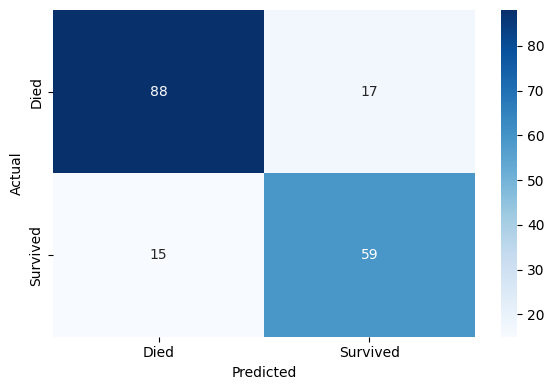

In [60]:
# مصفوفة الالتباس
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

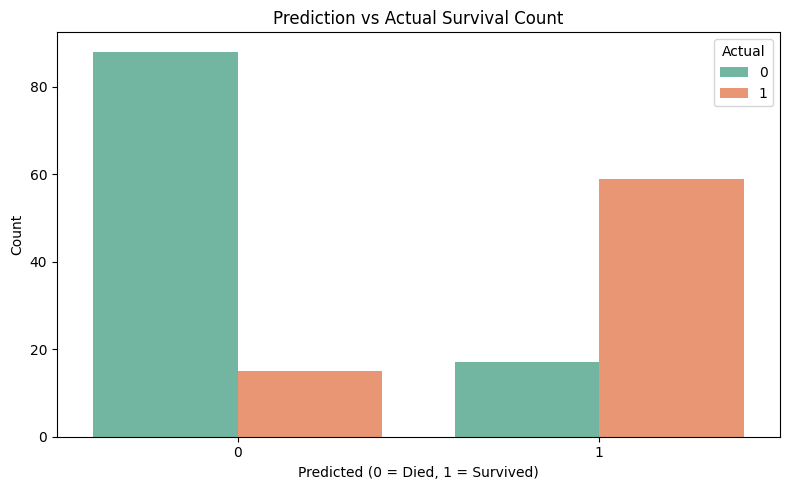

In [61]:
# رسم بياني لتوزيع التوقعات مقابل الحقيقة
# Histogram of the distribution of expectations versus reality

# إضافة عمود التوقع لنسخة من بيانات الاختبار
results_df = x_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred

# ارسم توزيع التوقعات مقابل الحقيقة
plt.figure(figsize=(8, 5))
sns.countplot(data=results_df, x='Predicted', hue='Actual', palette='Set2')
plt.title('Prediction vs Actual Survival Count')
plt.xlabel('Predicted (0 = Died, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Actual')
plt.tight_layout()
plt.savefig("prediction_vs_actual.png", dpi=300)
plt.show()
